Importing the required libraries

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
from IPython.display import Image
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import scipy.stats as stats
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import seaborn as sns

## 1) Use the state data generated in Stage II to fit a distribution to the number of COVID-19 new cases using any of MoM, MLE, and KDE methods.

- ### Graphically plot the distribution.
- ### Describe the type of distribution and its statistics (moments of a distribution - center, variance, skewness, kurtosis) in the notebook.
- ### Compare the distribution and its statistics to 3 other states of your choosing. Describe if the distributions look different and what does that imply.

Reading the California state data generated in the Stage-II

In [2]:
ca_state = pd.read_csv('../../../../data/Stage_2/state_data_daily.csv')
ca_state

,Dates,cases,deaths,population,new_cases,new_deaths
0,2022-05-30,8967578,90624,39512223,16380.0,90.0
1,2022-05-31,8973066,90626,39512223,5488.0,2.0
2,2022-06-01,8984553,90627,39512223,11487.0,1.0
3,2022-06-02,8986351,90627,39512223,1798.0,0.0
4,2022-06-03,8986351,90627,39512223,0.0,0.0
...,...,...,...,...,...,...
213,2022-12-29,10883092,97562,39512223,0.0,0.0
214,2022-12-30,10883092,97562,39512223,0.0,0.0
215,2022-12-31,10883092,97562,39512223,0.0,0.0
216,2023-01-01,10883092,97562,39512223,0.0,0.0


Plotting the histogram for the new cases across the California State from 30th May 2023 to 2nd Jan 2023

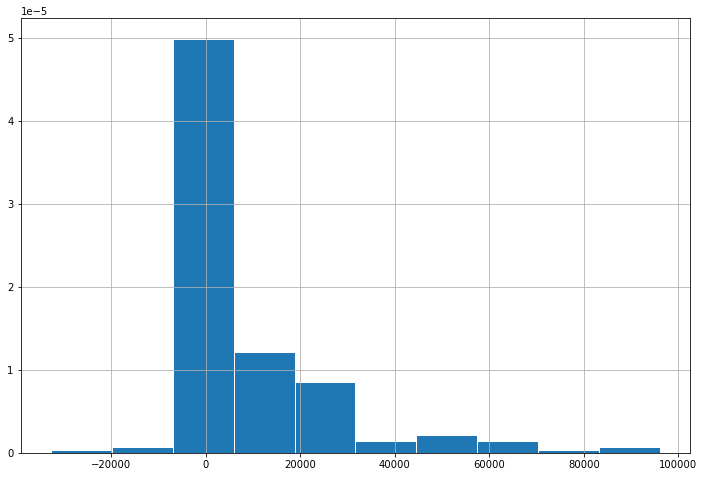

In [3]:
ax=ca_state.new_cases.hist(density = True,ec='white',figsize = (12,8))

Now we need a distribution to fit the new cases. Let us see if we can fit gamma distribution using mom method on new cases histogram. For implementing gamma distribution using mom method we need to find out the mean and variance as MoM depends on the mean and variance. Using this mean and variance values calculate the alpha and beta parameters as they are essential parameters for the gamma distribution.

In [4]:
ca_state_mean = ca_state.new_cases.mean() #mean of the new cases
ca_state_var = ca_state.new_cases.var() #Variance of the new cases
alpha_mom = ca_state_mean **2/ca_state_var #Alpha parameter using mom method
beta_mom = ca_state_var/ca_state_mean #Beta parameter using mom method

In [5]:
alpha_mom

0.27426724620239956

In [6]:
beta_mom

32311.18263399574

In [7]:
ca_state_mean

8861.899082568807

In [8]:
ca_state_var

286338439.74092

Using the obtained alpha and beta parameters plotting the distribution over the histogram

Moment of Distribution = 0.27426724620239956 0.27426724620239956 3.818941648931559 21.87647297691614


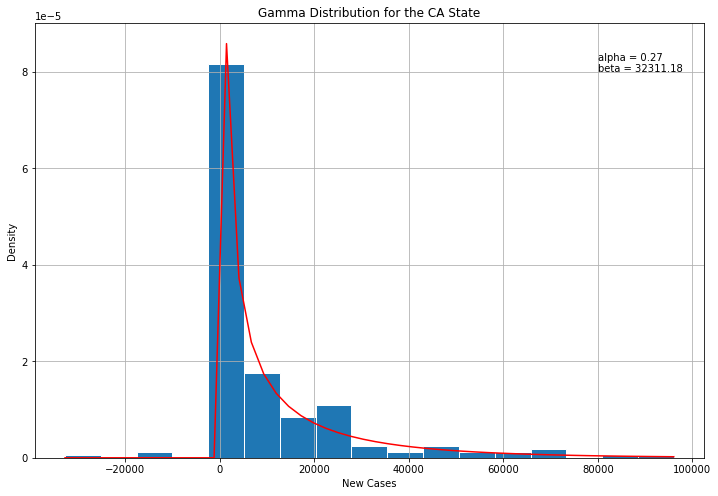

In [9]:
mean_gamma, var_gamma, skew_gamma, kurt_gamma = stats.gamma.stats(alpha_mom,moments='mvsk')
print('Moment of Distribution =',mean_gamma, var_gamma, skew_gamma, kurt_gamma)

plt.figure(figsize=(12,8))
plt.grid()
plt.hist(ca_state['new_cases'],density=True, bins=17, ec='white')
label = 'alpha = {0:.2f}\nbeta = {1:.2f}'.format(alpha_mom, beta_mom)
plt.annotate(label, xy=(80000, 0.00008))
plt.plot(np.linspace(ca_state.new_cases.min(),ca_state.new_cases.max() ), stats.gamma.pdf(np.linspace(ca_state.new_cases.min(),ca_state.new_cases.max()), alpha_mom, scale = beta_mom),'r')
plt.title('Gamma Distribution for the CA State')
plt.xlabel('New Cases')
plt.ylabel('Density')
plt.show()

From the above plot we can observe that gamma distribution using mom didn’t fit correctly for some part of the histogram on the new cases.

Let us see if we can fit poisson distribution using mom method on new cases histogram. In poisson distribution we know that mean is equal to variance. So find the mean of the new cases. Using the mean value plotting the poisson distribution on the new cases histogram

Moments of Distribution =  8861.899082568807 8861.899082568807 0.010622741175524742 0.00011284263008218878


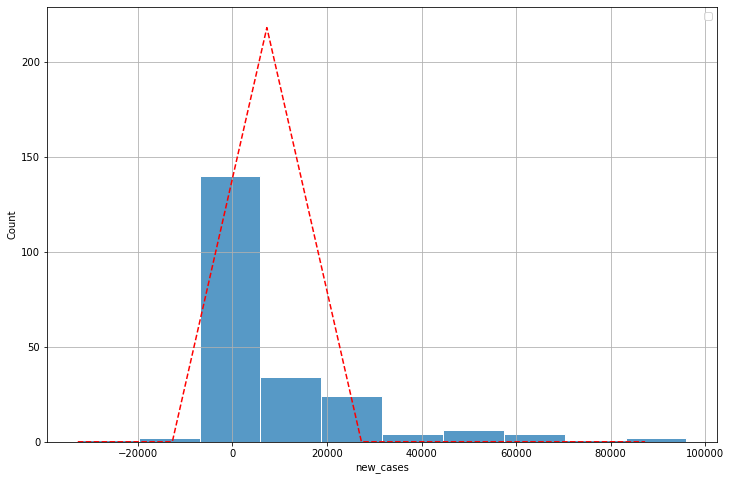

In [10]:
mu = ca_state["new_cases"].mean() 

mean_poisson, var_poisson, skew_poisson, kurt_poisson = stats.poisson.stats(mu= ca_state['new_cases'].mean(), moments='mvsk')
print('Moments of Distribution = ',mean_poisson, var_poisson, skew_poisson, kurt_poisson)


ax=sns.histplot(ca_state["new_cases"],bins=10,ec='white')
ca_state.new_cases.hist(density = True,ec='white',figsize=(12,8))
l2,=plt.plot(np.arange(ca_state['new_cases'].min(),ca_state['new_cases'].max() ,20000), [stats.poisson.pmf(np.arange(i, i+20000), mu).sum()*len(ca_state["new_cases"])
                                  for i in np.arange(ca_state['new_cases'].min(),ca_state['new_cases'].max() ,20000)], 'r--')
plt.legend(handles=[l2])

plt.show()

From the above plot we can observe that poisson distribution is not so good fit for the California State data as the data is widely spread i.e., data is over-dispersed. If the data is widely spread then that poisson distribution is not good. Also if you observe the mean and variance differ very much. But in poisson mean and variance are equal. So poisson distribution is not a good fit for this data 

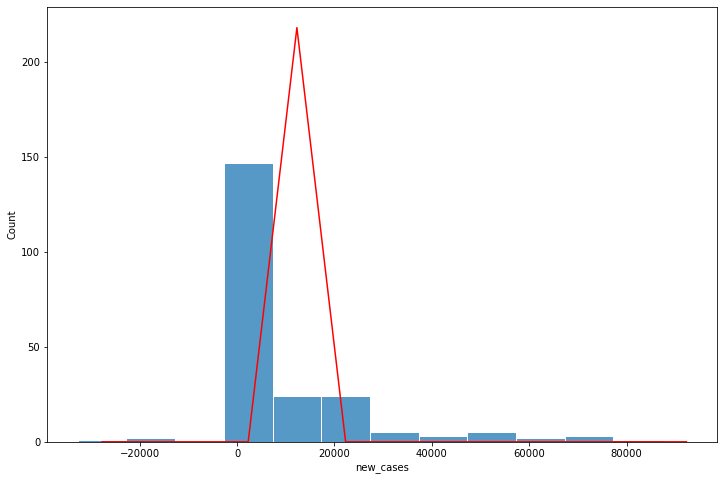

In [11]:
binwidth = 10000
xstart = ca_state.new_cases.min()
xend = ca_state.new_cases.max()
bins = np.arange(xstart,xend,binwidth)

mu = ca_state["new_cases"].mean()
n = len(ca_state)

plt.figure(figsize=(12,8))

o = sns.histplot(data=ca_state["new_cases"],bins=bins,ec='white')

plt.plot(bins + binwidth/2 , n*(stats.poisson.cdf(bins+binwidth,mu) - stats.poisson.cdf(bins,mu)), color='red')

As we came to know that our data is widely spread let us know try negative binomial distribution which is somewhat good in this type of cases. Now let us try to fit the negative binomial distribution using the MoM method. For that let us first find the variance and  mean. Using this mean and variance let us find the n,p and r values. After that using these values plot the negative binomial distribution on the new cases histogram.

Moment of Distribution=  8861.899082568807 286338439.74092007 3.818882552647585 21.87579592462802


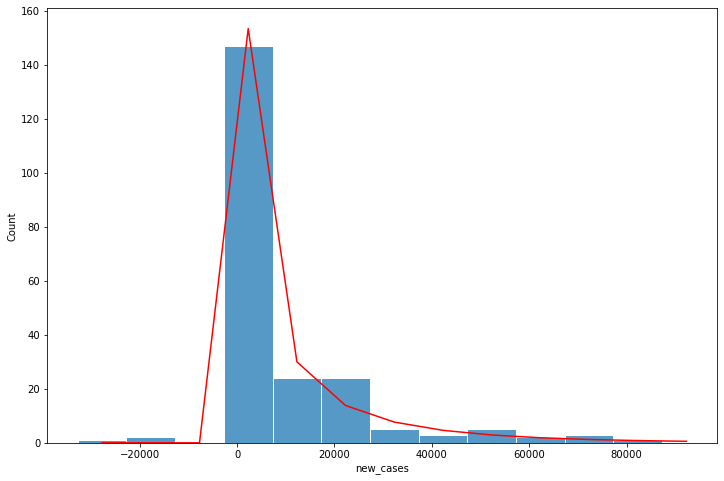

In [12]:
binwidth = 10000
xstart = ca_state.new_cases.min()
xend = ca_state.new_cases.max()
bins = np.arange(xstart,xend,binwidth)

Var = ca_state["new_cases"].var() # Variance
mu = ca_state["new_cases"].mean() #Mean 
p =  (mu/Var) #probability of sucess
r = mu**2 / (Var-mu) 
n = len(ca_state)

mean_nbinom, var_nbinom, skew_nbinom, kurt_nbiom = stats.nbinom.stats(r, p, moments='mvsk')
print('Moment of Distribution= ',mean_nbinom, var_nbinom, skew_nbinom, kurt_nbiom)


plt.figure(figsize=(12,8))

o = sns.histplot(data=ca_state["new_cases"],bins=bins,ec='white')

plt.plot(bins + binwidth/2 , 
         n*(stats.nbinom.cdf(bins+binwidth,r,p) - stats.nbinom.cdf(bins,r,p)), 
         color='red')

From the above plot we can see that negative binomial distribution using MoM fitted good for the California state new cases data compared to the poisson and gamma using MoM. 

<AxesSubplot:>

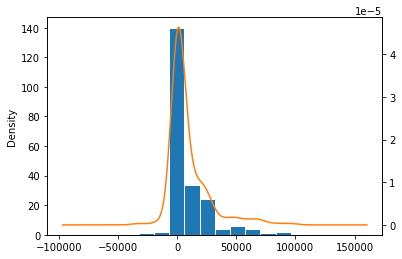

In [13]:
ax=ca_state.new_cases.plot(kind='hist',ec = 'white')
ca_state.new_cases.plot(kind='kde', ax=ax, secondary_y=True)

Till now we tried to implement the distributions using MoM method. Now let us try to implement using the Kernel Density Estimation Method. We know that the Kernel Density Estimation is a non-parametric method of estimating the PDF function. It is non-parametric method because it does not assume any underlying distribution. In Kernel Density estimation we use the gaussian kernel. The advantage of Gaussian kernel is that it automatically determines the bandwidth which is the important parameter of the kernel density estimator. Now plotting the kernel density estimation using the scipy stats kde on the new cases histogram

Moments of Distribution =  0.0 285024960.6595404 2.3749707776792013 6.803399438550649


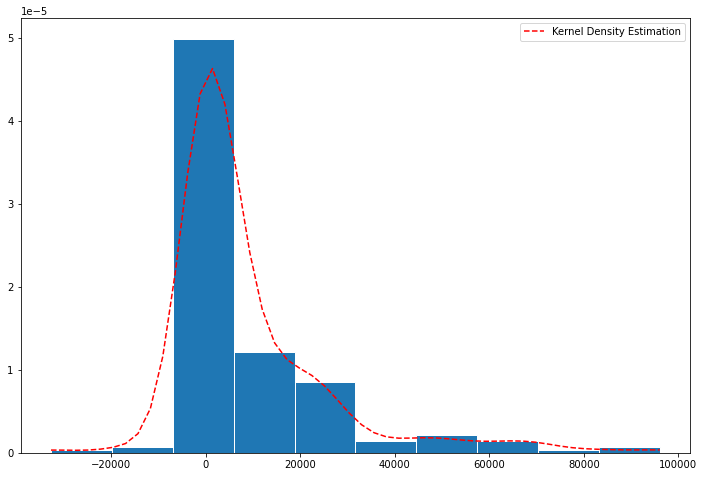

In [14]:
new_cases = ca_state.new_cases
Mean = stats.moment(new_cases,moment=1)
Variance = stats.moment(new_cases,moment=2)
Skewness = stats.moment(new_cases,moment=3)/Variance**1.5
Kurtosis = stats.moment(new_cases,moment=4)/Variance**2-3
print('Moments of Distribution = ',Mean, Variance,Skewness,Kurtosis)
ax = new_cases.hist(density=True, grid=False, ec='white', figsize=(12,8))
x = np.linspace(new_cases.min(), new_cases.max())
density = stats.kde.gaussian_kde(new_cases, bw_method=None)
l3,=plt.plot(x, density(x), 'r--', label="Kernel Density Estimation")
plt.legend(handles=[l3])

From the above plot we can observe that the Kernel Density Estimation method is a very good fit compared to the MoM method. If we try to adjust the bandwidth between 0.1-0.5 then we could get optimally smoothed kernel density estimate for the new cases data of CA State.

If we give the bandwidth=0.3 then below is the kernel density estimate

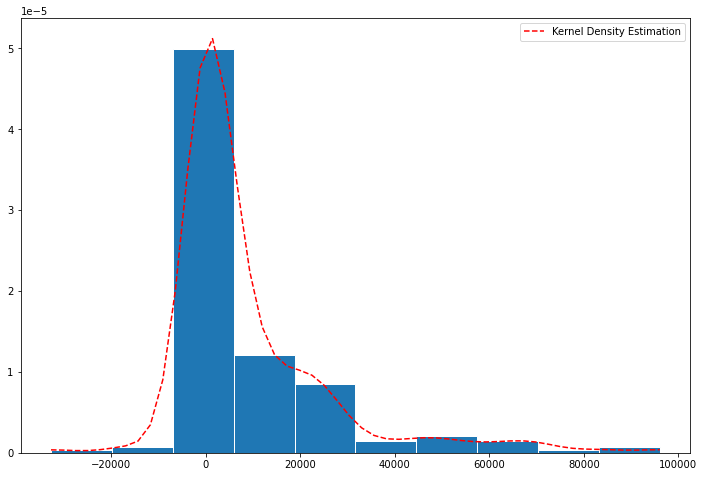

In [15]:
new_cases = ca_state.new_cases
ax = new_cases.hist(density=True, grid=False, ec='white', figsize=(12,8))
x = np.linspace(new_cases.min(), new_cases.max())
density = stats.kde.gaussian_kde(new_cases, bw_method=0.3)
l3,=plt.plot(x, density(x), 'r--', label="Kernel Density Estimation")
plt.legend(handles=[l3])

Moments of Distribution for California State when calculated separately

In [16]:
mean = ca_state['new_cases'].mean()
var = ca_state['new_cases'].var()
skewness = ca_state['new_cases'].skew()
kurtosis = ca_state['new_cases'].kurtosis()
print('Mean of CA State = ',mean)
print('Variance of CA State = ',var)
print('Skewness of CA State = ',skewness)
print('Kurtosis of CA State =',kurtosis)

Mean of CA State =  8861.899082568807
Variance of CA State =  286338439.74092
Skewness of CA State =  2.3914573111930033
Kurtosis of CA State = 6.990093701943205


Reading the data of selected states in the Stage-II

In [17]:
selected_states = pd.read_csv('../../../../data/Stage_2/selected_states_data_daily.csv')
selected_states

,State,Dates,cases,deaths,population,new_cases,new_deaths
0,CA,2022-05-30,8967578,90624,39512223,16380.0,90.0
1,CA,2022-05-31,8973066,90626,39512223,5488.0,2.0
2,CA,2022-06-01,8984553,90627,39512223,11487.0,1.0
3,CA,2022-06-02,8986351,90627,39512223,1798.0,0.0
4,CA,2022-06-03,8986351,90627,39512223,0.0,0.0
...,...,...,...,...,...,...,...
867,NY,2022-12-29,6439014,73867,19453561,44889.0,0.0
868,NY,2022-12-30,6439014,74252,19453561,0.0,385.0
869,NY,2022-12-31,6439014,74252,19453561,0.0,0.0
870,NY,2023-01-01,6439014,74252,19453561,0.0,0.0


In [18]:
c = selected_states.State.value_counts()#Count of unique states in the dataframe

In [19]:
new_cases_list = selected_states['new_cases'].tolist() #Taking new cases column into a list

Finding the alpha and beta parameters of the gamma distribution for each state using the Method of Moments methods

In [20]:
def alpha_beta_mom(selected_states,new_cases_list,c):
    alpha_mom,beta_mom,mean,var = [],[],[],[]
    for i in range(len(c)):
        mean.append(np.mean(new_cases_list[i*int(len(selected_states)/len(c)):(i+1)*int(len(selected_states)/len(c))]))
        var.append(np.var(new_cases_list[i*int(len(selected_states)/len(c)):(i+1)*int(len(selected_states)/len(c))]))
    for i in range(len(c)):
        alpha_mom.append(mean[i]**2/var[i])
        beta_mom.append(var[i]/mean[i])
    return alpha_mom,beta_mom    

In [21]:
alpha_mom,beta_mom = alpha_beta_mom(selected_states,new_cases_list,c)

In [22]:
alpha_mom

[0.27553115056277855,
 0.12755008224764702,
 0.2908132252655336,
 0.5158161144245607]

In [23]:
beta_mom

[32162.966199894927, 20566.80888722836, 8185.035297442426, 9365.927498532597]

Now with the help of the alpha and beta parameters plotting the gamma distribution of each state and calculating the moments of distribution of gamma distribution

Moments of Distribution =  0.27553115056277855 0.27553115056277855 3.810172540576442 21.776122183444105


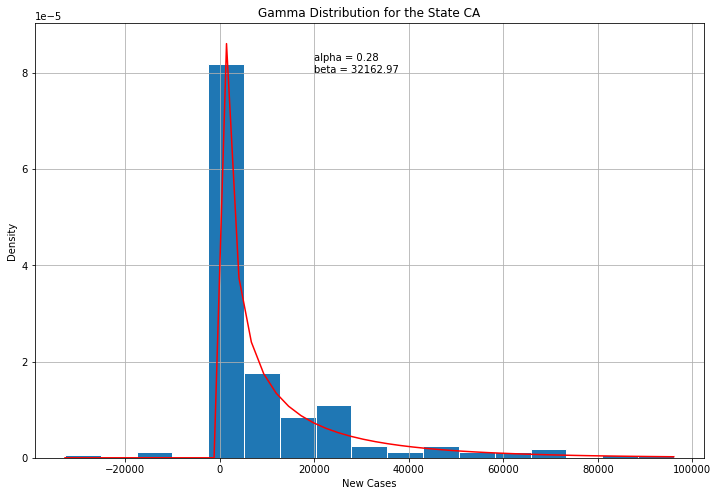

Moments of Distribution =  0.12755008224764702 0.12755008224764702 5.600020594613261 47.04034599013898


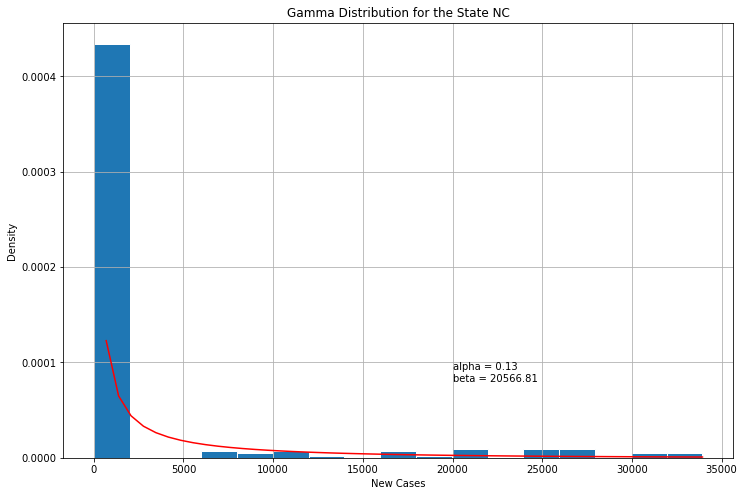

Moments of Distribution =  0.2908132252655336 0.2908132252655336 3.7087103746771097 20.631798964856443


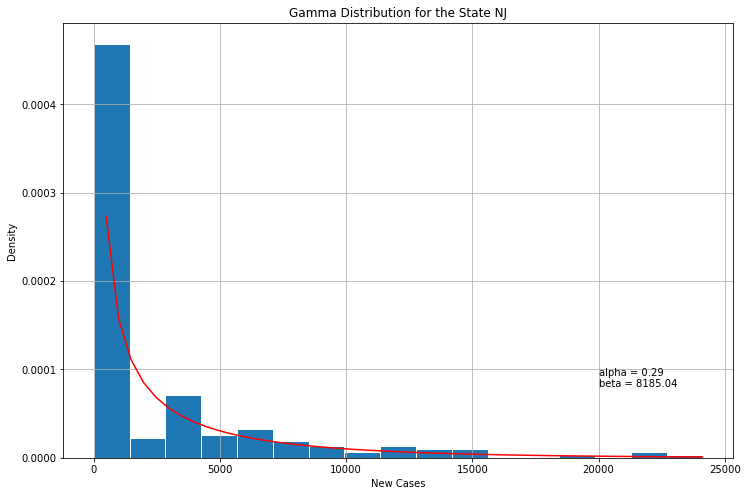

Moments of Distribution =  0.5158161144245607 0.5158161144245607 2.7847264690208893 11.632052260898325


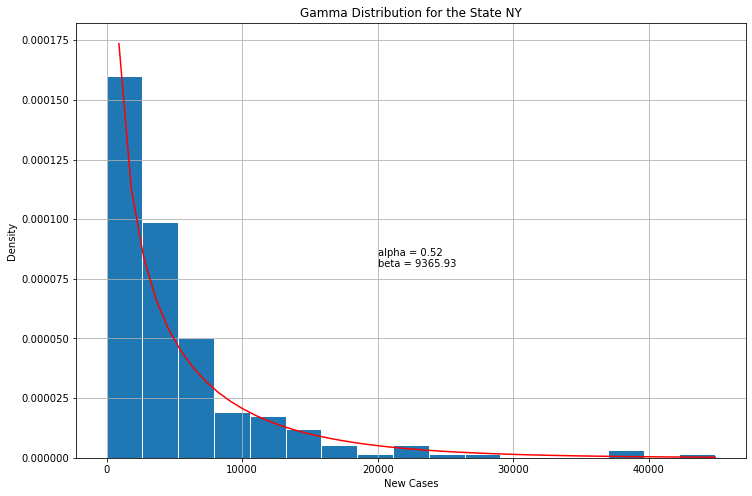

In [24]:
x=0
for i in selected_states.State.unique():
    df = selected_states[selected_states['State']==i]
    x=x+1
    mean_gamma, var_gamma, skew_gamma,kurt_var = stats.gamma.stats(alpha_mom[x-1],moments='mvsk')
    print('Moments of Distribution = ',mean_gamma, var_gamma, skew_gamma,kurt_var)
    plt.figure(figsize=(12,8))
    plt.grid()
    plt.hist(df['new_cases'],density=True, bins=17, ec='white')
    label = 'alpha = {0:.2f}\nbeta = {1:.2f}'.format(alpha_mom[x-1], beta_mom[x-1])
    plt.annotate(label, xy=(20000, 0.00008))
    plt.plot(np.linspace(df.new_cases.min(),df.new_cases.max() ), stats.gamma.pdf(np.linspace(df.new_cases.min(),df.new_cases.max()), alpha_mom[x-1], scale = beta_mom[x-1]),'r',label ='Gamma Distribution')
    plt.title('Gamma Distribution for the State '+i)
    plt.xlabel('New Cases')
    plt.ylabel('Density')
    plt.show()
   
    

Plotting the poisson distribution and calculating the moments of distribution for each state in the dataframe

Moments of Distribution =  8861.899082568807 8861.899082568807 0.010622741175524742 0.00011284263008218878


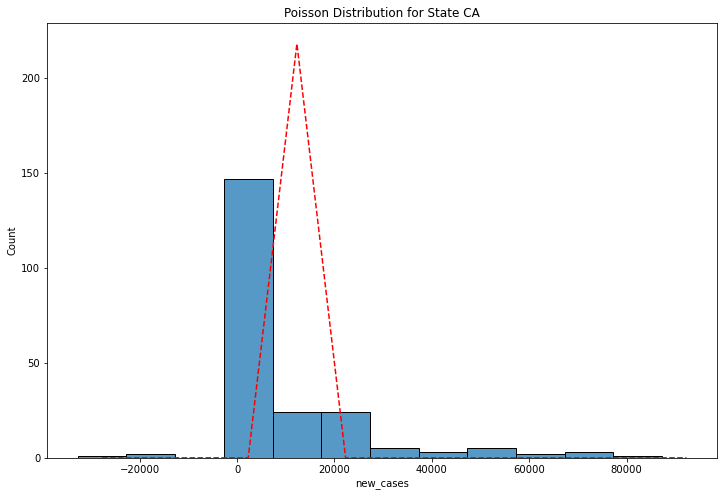

Moments of Distribution =  2623.298165137615 2623.298165137615 0.01952433147328663 0.00038119951947877085


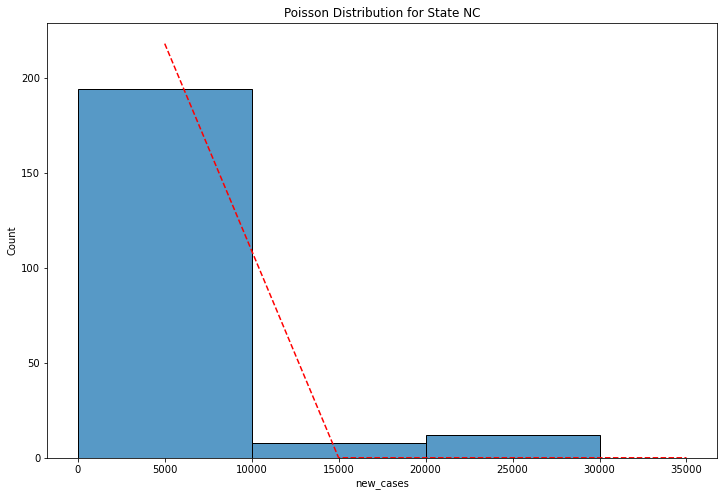

Moments of Distribution =  2380.316513761468 2380.316513761468 0.020496638674091523 0.0004201121969362644


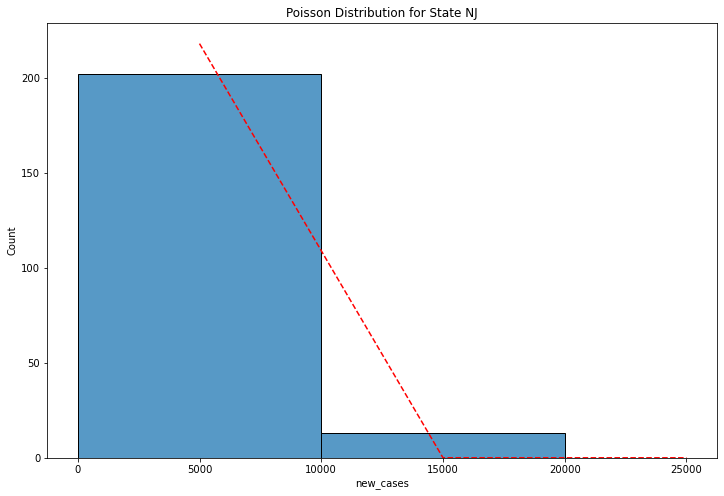

Moments of Distribution =  4831.09633027523 4831.09633027523 0.014387228837635707 0.00020699235362649652


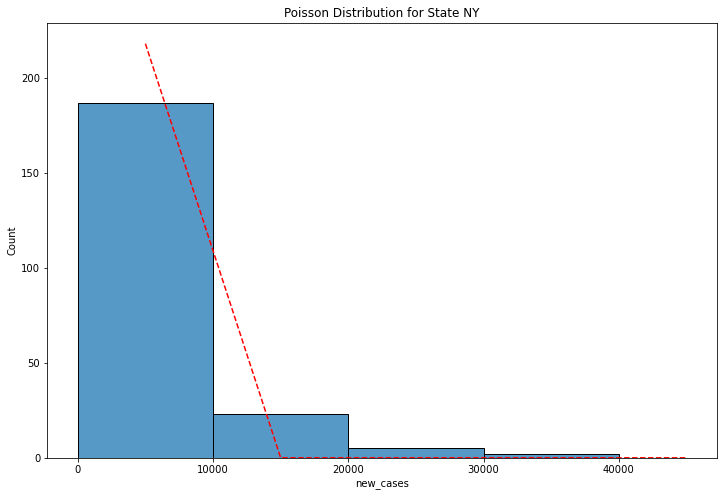

In [25]:
for i in selected_states.State.unique():
    df = selected_states[selected_states['State']==i]
    mean_poisson, var_poisson, skew_poisson, kurt_poisson = stats.poisson.stats(mu= df['new_cases'].mean(), moments='mvsk')
    print('Moments of Distribution = ',mean_poisson, var_poisson, skew_poisson, kurt_poisson)

    binwidth = 10000
    xstart = df.new_cases.min()
    xend = df.new_cases.max()
    bins = np.arange(xstart,xend,binwidth)

    mu = df["new_cases"].mean()
    n = len(df)

    plt.figure(figsize=(12,8))
    plt.grid(False)

    o = sns.histplot(data=df["new_cases"],bins=bins)

    plt.plot(bins + binwidth/2 , n*(stats.poisson.cdf(bins+binwidth,mu) - stats.poisson.cdf(bins,mu)), 'r--',label = 'Poisson Distribution')
    plt.title('Poisson Distribution for State '+i)
    plt.show()

Plotting the negative binomial distribution and calculating the moment of distributions for each state in the dataframe

Moments of Distribution =  8861.899082568807 286338439.74092007 3.818882552647585 21.87579592462802


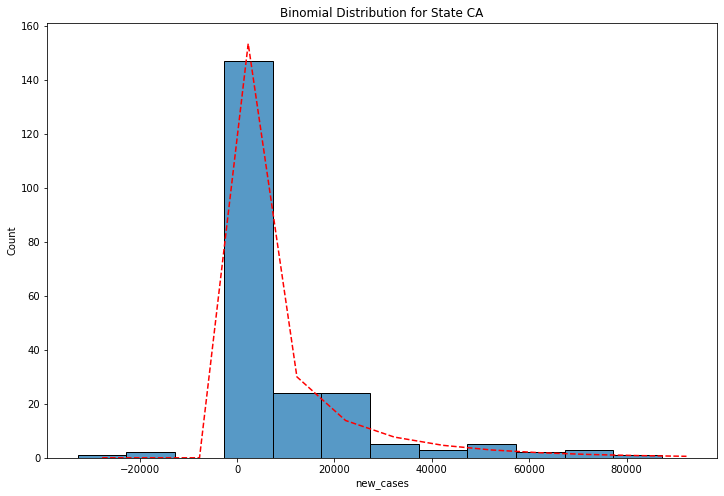

Moments of Distribution =  2623.2981651376144 54201502.76322223 5.6127732069313385 47.25483459944462


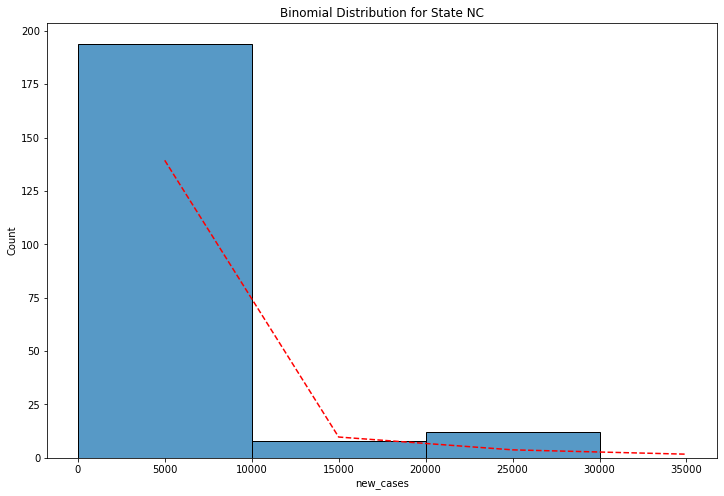

Moments of Distribution =  2380.316513761468 19572757.977698427 3.717019933844547 20.72435575735087


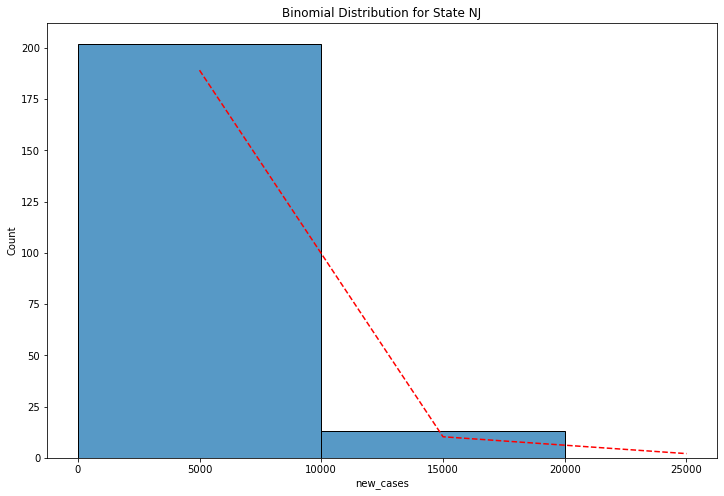

Moments of Distribution =  4831.09633027523 45456212.70496342 2.790987193001183 11.684414256245335


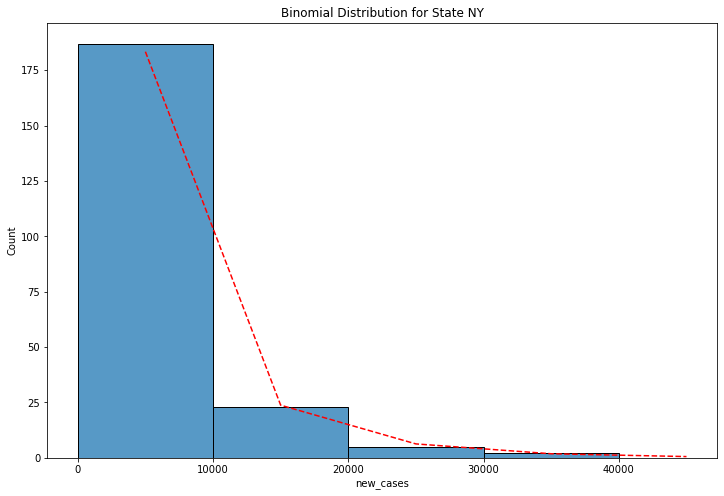

In [26]:
for i in selected_states.State.unique():
    df = selected_states[selected_states['State']==i]
    
    
    

    binwidth = 10000
    xstart = df.new_cases.min()
    xend = df.new_cases.max()
    bins = np.arange(xstart,xend,binwidth)

    Var = df["new_cases"].var()
    mu = df["new_cases"].mean()
    p =  (mu/Var)
    r = mu**2 / (Var-mu)
    n = len(df)
    
    mean_nbinom, var_nbinom, skew_nbinom, kurt_nbiom = stats.nbinom.stats(r, p, moments='mvsk')
    print('Moments of Distribution = ',mean_nbinom, var_nbinom, skew_nbinom, kurt_nbiom)
    
    plt.figure(figsize=(12,8))

    o = sns.histplot(data=df["new_cases"],bins=bins)

    plt.plot(bins + binwidth/2 , 
         n*(stats.nbinom.cdf(bins+binwidth,r,p) - stats.nbinom.cdf(bins,r,p)), 
         'r--')
    plt.title('Binomial Distribution for State '+i)
    plt.show()

Plotting the Kernel Denisty Estimation method for each state in states dataframe. Here I selected the input for bandwidth as 0.3 by trail and error as we can see the optimally smoothed kernel density estimate for each state.

Moments of Distribution =  0.0 285024960.6595404 2.3749707776792013 6.803399438550649


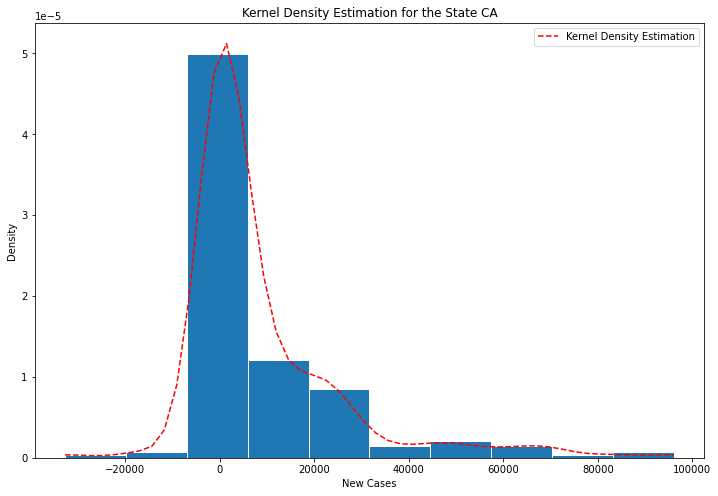

Moments of Distribution =  0.0 53952872.01660214 2.799712045322046 6.647819084501451


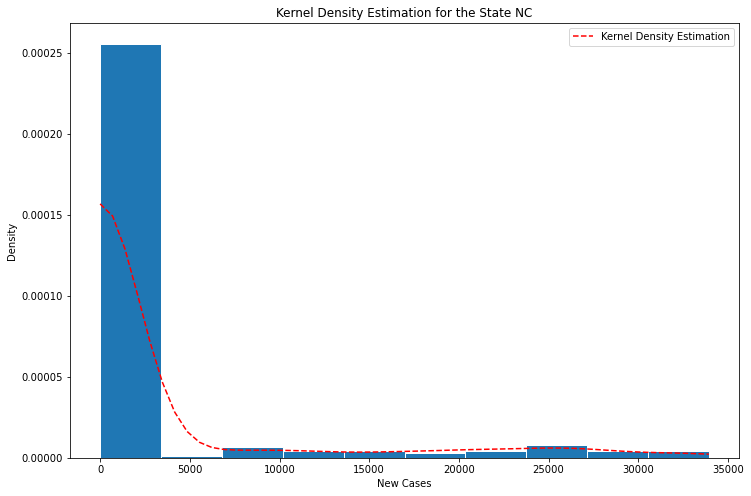

Moments of Distribution =  0.0 19482974.684222713 2.367864874901551 6.013621275751568


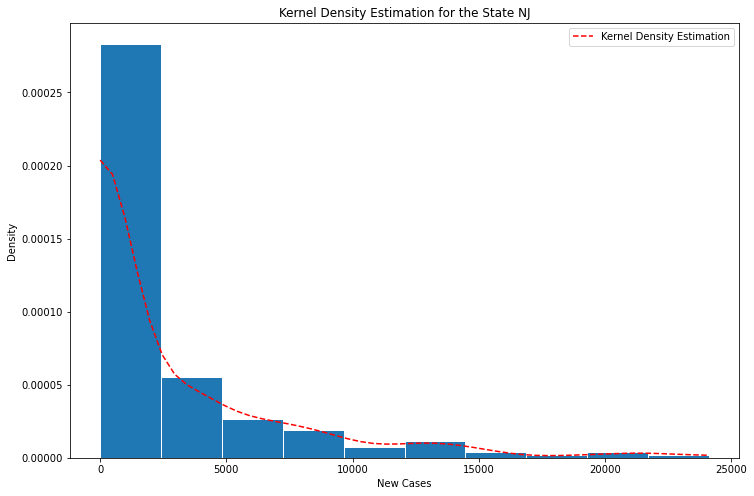

Moments of Distribution =  0.0 45247697.967784695 2.720357553107269 10.184112477132183


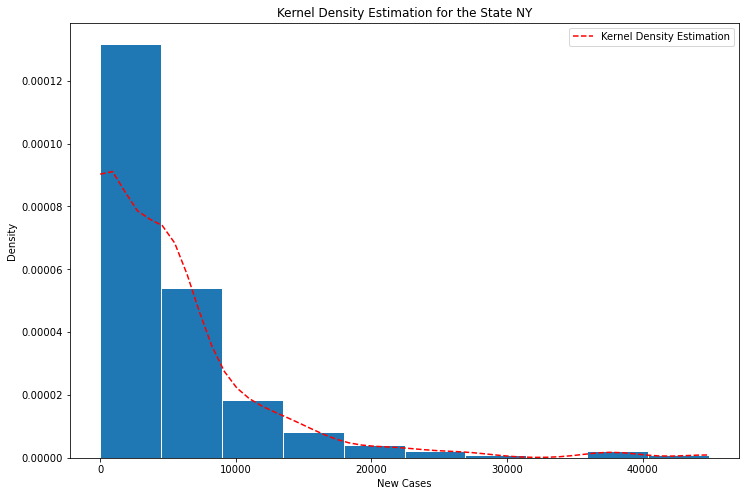

In [27]:
#bw = [0.3,0.01,0.2,0.02]
#indices = np.random.choice(range(len(bw)))
#bw1 = np.array(bw).astype(int)
#print(bw1)
#x=0
for i in selected_states.State.unique():
    df = selected_states[selected_states['State']==i]
    #x= x+1
    new_cases = df.new_cases
    Mean = stats.moment(df.new_cases,moment=1)
    Variance = stats.moment(df.new_cases,moment=2)
    Skewness = stats.moment(df.new_cases,moment=3)/Variance**1.5
    Kurtosis = stats.moment(df.new_cases,moment=4)/Variance**2-3
    print('Moments of Distribution = ',Mean, Variance,Skewness,Kurtosis)
    ax = new_cases.hist(density=True, grid=False, ec='white', figsize=(12,8))
    x = np.linspace(new_cases.min(), new_cases.max())
    density = stats.kde.gaussian_kde(new_cases, bw_method=0.3)
    l3,=plt.plot(x, density(x), 'r--', label="Kernel Density Estimation")
    plt.legend(handles=[l3])
    plt.title('Kernel Density Estimation for the State '+i)
    plt.xlabel('New Cases')
    plt.ylabel('Density')
    plt.show()

Function which calculates the moments of distribution separately for each state in the dataframe

In [28]:
def mod(selected_states,new_cases_list,c):
    mean,var,skew,kurtosis= [],[],[],[]
    for i in range(len(c)):
        mean.append(np.mean(new_cases_list[i*int(len(selected_states)/len(c)):(i+1)*int(len(selected_states)/len(c))]))
        var.append(np.var(new_cases_list[i*int(len(selected_states)/len(c)):(i+1)*int(len(selected_states)/len(c))]).round(decimals=1))
        skew.append(stats.skew(new_cases_list[i*int(len(selected_states)/len(c)):(i+1)*int(len(selected_states)/len(c))]))
        kurtosis.append(stats.kurtosis(new_cases_list[i*int(len(selected_states)/len(c)):(i+1)*int(len(selected_states)/len(c))]))  
    return mean,var,skew,kurtosis
    

In [29]:
mean,var,skew,kurtosis = mod(selected_states,new_cases_list,c)

In [30]:
states = selected_states['State'].unique().tolist()
states

['CA', 'NC', 'NJ', 'NY']

Moments of distributions obtained for each state

In [31]:
mod_df = pd.DataFrame({'State':states,'Mean':mean,'Variance':var,'Skewness':skew,'Kurtosis':kurtosis})
mod_df

,State,Mean,Variance,Skewness,Kurtosis
0,CA,8861.899083,285024960.7,2.374971,6.803399
1,NC,2623.298165,53952872.0,2.799712,6.647819
2,NJ,2380.316514,19482974.7,2.367865,6.013621
3,NY,4831.096330,45247698.0,2.720358,10.184112


From the above moments of distribution for each state we can see each state follows the same trends.Coming to the Skewness the values are almost same for each state and are positive that means each state data are right skewed. Right tails are more compared to the left tails. Coming to the kurtosis the NY state has the highest kurtosis remaining states are almost similar. So the NY state data is highly tailed.

Distributions for each state looks different because each state registers different number of cases. Histogram spread depends on the number of new cases so the spread would be different from one state to another. So the distributions differ.

Coming to the distributions for each state, negative binomial distribution using MoM is more suitable for state whose data is more widely spread followed by the gamma distribution. If state data is not widely spread then the poisson distribution will be a very good fit. Also if we observe the state data which we have with us it is a discrete data not continous. So discrete distribution fits good for our data. 

Apart from all these distribution Kernel density estimation method works very good compared to the method of moments method. We can get best kernel density estimate by giving the bandwidth parameter. If we select between 0.1-0.5 then we can see optimally smoothed kernel density estimate.

Reading the census_demographic dataset that is generated after cleaning and selecting required columns in the Stage_I

## 2) Based on the results in Stage I, perform corelation between Enrichment data valiables and COVID-19 cases to observe any patterns. 

- ### You can compare either within your chosen specific state or among different states with the different enrichment variables. Within the state you can compare the county based covid data to enrichment data for correlation. Between states you would need to aggregate to state level data and then perform correlation. Both covid and enrichment data will need to be normalized for population. For number of covid cases you can use a measure of center value (median or mean) to compare the number of cases

In [32]:
census_demographic= pd.read_csv('../../../../data/Stage_1/census_demographic.csv')
census_demographic

,countyFIPS,County Name,State,Male population,Female population,Under 5years,5 to 9years,10 to 14years,15 to 19years,20 to 24years,...,Male(65years and above),Female(65years and over),One race population,White population,Black population,Asian population,Total Housing units,Voting population,Male voting population,Female voting population
0,1001,Autauga County,AL,28206,30033,3318,3716,4004,3939,3648,...,3919,4896,56166,43755,11470,647,24170,43906,21018,22888
1,1003,Baldwin County,AL,110781,116350,12035,11730,16407,13801,11181,...,21795,25010,219535,192034,19895,2175,121763,174686,83847,90839
2,1005,Barbour County,AL,13361,11898,1320,1601,1422,1487,1434,...,2084,2717,24641,11495,11985,106,11667,19623,10571,9052
3,1007,Bibb County,AL,12300,10112,1196,1274,1230,1463,1192,...,1629,1965,22111,17020,5003,46,9013,17682,9690,7992
4,1009,Blount County,AL,29530,29354,3467,3578,4194,3591,3386,...,4726,5858,56921,54439,760,216,24527,43633,21535,22098
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3138,56037,Sweetwater County,WY,21850,20609,2657,3456,3008,3017,2505,...,2608,2782,39597,36867,525,487,19174,30055,15515,14540
3139,56039,Teton County,WY,12280,11039,1068,1032,1475,1144,941,...,1829,1780,22643,19873,166,369,13255,17273,9135,8138
3140,56041,Uinta County,WY,10437,10077,1413,1712,1762,1327,1067,...,1540,1482,19536,18899,52,37,8819,14203,7206,6997
3141,56043,Washakie County,WY,4004,3764,399,321,606,633,386,...,824,906,7328,6655,1,31,3842,5993,3013,2980


Selecting the data of selected states i.e., CA,NC,NJ and NY and aggregating the sum of data for the each selected states

In [33]:
census_demographic = census_demographic[census_demographic['State'].isin(['CA','NC','NJ','NY'])]
census_demographic = census_demographic.groupby('State').sum().reset_index()
census_demographic

,State,countyFIPS,Male population,Female population,Under 5years,5 to 9years,10 to 14years,15 to 19years,20 to 24years,25 to 34years,...,Male(65years and above),Female(65years and over),One race population,White population,Black population,Asian population,Total Housing units,Voting population,Male voting population,Female voting population
0,CA,351364,19714044,19741309,2350335,2434113,2658361,2588625,2626849,5941622,...,2549526,3120353,35220136,20553732,2233258,5887396,14328539,25916215,12796956,13119259
1,NC,3710000,5067666,5299356,594004,627382,675846,698427,686487,1376001,...,746168,940067,9866564,6865508,2193147,314690,4673933,7615601,3656483,3959118
2,NJ,714441,4539311,4694713,530376,557847,590073,584965,559157,1179836,...,653101,841415,8616754,5787873,1225321,900516,3738342,6384667,3086484,3298183
3,NY,2235844,9821711,10293034,1154376,1131385,1207089,1243126,1297689,2904643,...,1451787,1878372,18914032,12215118,3058846,1739196,8449178,14182047,6802513,7379534


In [34]:
census_demographic.dtypes

State                        object
countyFIPS                    int64
Male population               int64
Female population             int64
Under 5years                  int64
5 to 9years                   int64
10 to 14years                 int64
15 to 19years                 int64
20 to 24years                 int64
25 to 34years                 int64
35 to 44 years                int64
45 to 54years                 int64
55 to 59years                 int64
60 to 64years                 int64
65 to 74years                 int64
75 to 84years                 int64
85years and over              int64
Under 18years                 int64
18years and above             int64
65years and above             int64
Male(18years and above)       int64
Female(18years and above)     int64
Male(65years and above)       int64
Female(65years and over)      int64
One race population           int64
White population              int64
Black population              int64
Asian population            

In [35]:
population = selected_states['population'].unique().tolist()
population

[39512223, 10488084, 8882190, 19453561]

Reading the super long covid-19 data

In [36]:
super_19_df= pd.read_csv('../../../../data/Stage_2/super_19_stage3.csv')
super_19_df

,countyFIPS,County Name,State,StateFIPS,Dates,cases,deaths,population
0,1001,Autauga County,AL,1,2020-01-22,0,0,55869
1,1001,Autauga County,AL,1,2020-01-23,0,0,55869
2,1001,Autauga County,AL,1,2020-01-24,0,0,55869
3,1001,Autauga County,AL,1,2020-01-25,0,0,55869
4,1001,Autauga County,AL,1,2020-01-26,0,0,55869
...,...,...,...,...,...,...,...,...
3427917,56045,Weston County,WY,56,2023-01-12,1881,22,6927
3427918,56045,Weston County,WY,56,2023-01-13,1881,22,6927
3427919,56045,Weston County,WY,56,2023-01-14,1881,22,6927
3427920,56045,Weston County,WY,56,2023-01-15,1881,22,6927


In [37]:
super_19_df = super_19_df.groupby(['State','Dates']).sum().reset_index()
super_19_df

,State,Dates,countyFIPS,StateFIPS,cases,deaths,population
0,AK,2020-01-22,62340,58,0,0,731545
1,AK,2020-01-23,62340,58,0,0,731545
2,AK,2020-01-24,62340,58,0,0,731545
3,AK,2020-01-25,62340,58,0,0,731545
4,AK,2020-01-26,62340,58,0,0,731545
...,...,...,...,...,...,...,...
55636,WY,2023-01-12,1288529,1288,183385,1967,578759
55637,WY,2023-01-13,1288529,1288,183385,1967,578759
55638,WY,2023-01-14,1288529,1288,183385,1967,578759
55639,WY,2023-01-15,1288529,1288,183385,1967,578759


In [38]:
super_19_df['new_cases'] = super_19_df['cases'].diff()
super_19_df['new_deaths'] = super_19_df['deaths'].diff()
super_19_df

,State,Dates,countyFIPS,StateFIPS,cases,deaths,population,new_cases,new_deaths
0,AK,2020-01-22,62340,58,0,0,731545,NaN,NaN
1,AK,2020-01-23,62340,58,0,0,731545,0.0,0.0
2,AK,2020-01-24,62340,58,0,0,731545,0.0,0.0
3,AK,2020-01-25,62340,58,0,0,731545,0.0,0.0
4,AK,2020-01-26,62340,58,0,0,731545,0.0,0.0
...,...,...,...,...,...,...,...,...,...
55636,WY,2023-01-12,1288529,1288,183385,1967,578759,234.0,9.0
55637,WY,2023-01-13,1288529,1288,183385,1967,578759,0.0,0.0
55638,WY,2023-01-14,1288529,1288,183385,1967,578759,0.0,0.0
55639,WY,2023-01-15,1288529,1288,183385,1967,578759,0.0,0.0


In [39]:
super_19_df.to_csv('../../../../data/Stage_3/cases_deaths.csv', index = False)

In [40]:
super_19_df = super_19_df[super_19_df['State'].isin(['CA','NC','NJ','NY'])]
super_19_df

,State,Dates,countyFIPS,StateFIPS,cases,deaths,population,new_cases,new_deaths
4364,CA,2020-01-22,351364,348,722,0,39512223,-2391173.0,-29852.0
4365,CA,2020-01-23,351364,348,733,0,39512223,11.0,0.0
4366,CA,2020-01-24,351364,348,739,0,39512223,6.0,0.0
4367,CA,2020-01-25,351364,348,749,0,39512223,10.0,0.0
4368,CA,2020-01-26,351364,348,756,0,39512223,7.0,0.0
...,...,...,...,...,...,...,...,...,...
38180,NY,2023-01-12,2235844,2232,6499315,74822,19453561,0.0,281.0
38181,NY,2023-01-13,2235844,2232,6499315,74822,19453561,0.0,0.0
38182,NY,2023-01-14,2235844,2232,6499315,74822,19453561,0.0,0.0
38183,NY,2023-01-15,2235844,2232,6499315,74822,19453561,0.0,0.0


In [41]:
super_19_df= super_19_df[super_19_df['Dates']!= '2020-01-22']
super_19_df

,State,Dates,countyFIPS,StateFIPS,cases,deaths,population,new_cases,new_deaths
4365,CA,2020-01-23,351364,348,733,0,39512223,11.0,0.0
4366,CA,2020-01-24,351364,348,739,0,39512223,6.0,0.0
4367,CA,2020-01-25,351364,348,749,0,39512223,10.0,0.0
4368,CA,2020-01-26,351364,348,756,0,39512223,7.0,0.0
4369,CA,2020-01-27,351364,348,766,0,39512223,10.0,0.0
...,...,...,...,...,...,...,...,...,...
38180,NY,2023-01-12,2235844,2232,6499315,74822,19453561,0.0,281.0
38181,NY,2023-01-13,2235844,2232,6499315,74822,19453561,0.0,0.0
38182,NY,2023-01-14,2235844,2232,6499315,74822,19453561,0.0,0.0
38183,NY,2023-01-15,2235844,2232,6499315,74822,19453561,0.0,0.0


Grouping the dataframe by state to generate sum of newcases across each state 

In [42]:
super_19_df_sum = super_19_df.groupby('State').sum().reset_index()
super_19_df_sum

,State,countyFIPS,StateFIPS,cases,deaths,population,new_cases,new_deaths
0,CA,382986760,379320,5221045057,61058248,43068323070,10990199.0,98607.0
1,NC,4043900000,4033000,1547149671,15271885,11432011560,3382420.0,27908.0
2,NJ,778740690,778260,1373633200,25961351,9681587100,2959536.0,35637.0
3,NY,2437069960,2432880,3012627741,53408965,21204381490,6499315.0,74822.0


Grouping the dataframe by state to generate mean of newcases across each state 

In [43]:
super_19_df_mean = super_19_df.groupby('State').mean().reset_index()
super_19_df_mean

,State,countyFIPS,StateFIPS,cases,deaths,population,new_cases,new_deaths
0,CA,351364.0,348.0,4.789950e+06,56016.741284,39512223.0,10082.751376,90.465138
1,NC,3710000.0,3700.0,1.419403e+06,14010.903670,10488084.0,3103.137615,25.603670
2,NJ,714441.0,714.0,1.260214e+06,23817.753211,8882190.0,2715.170642,32.694495
3,NY,2235844.0,2232.0,2.763879e+06,48999.050459,19453561.0,5962.674312,68.644037


Grouping the dataframe by state to generate sum of newcases across each state across the date from 30th May 2022 to Jan 2nd 2023.

In [44]:
selected_states_sum_df = selected_states.groupby('State').sum().reset_index()
selected_states_sum_df

,State,cases,deaths,population,new_cases,new_deaths
0,CA,2217995009,20561316,8613664614,1931894.0,7028.0
1,NC,676340140,5736330,2286402312,571879.0,2985.0
2,NJ,584241535,7540825,1936317420,518909.0,1695.0
3,NY,1298662015,15457654,4240876298,1053179.0,6015.0


Grouping the dataframe by state to generate mean of newcases across each state across the date from 30th May 2022 to Jan 2nd 2023.

In [45]:
selected_states_mean_df = selected_states.groupby('State').mean().reset_index()
selected_states_mean_df

,State,cases,deaths,population,new_cases,new_deaths
0,CA,1.017429e+07,94317.963303,39512223.0,8861.899083,32.238532
1,NC,3.102478e+06,26313.440367,10488084.0,2623.298165,13.692661
2,NJ,2.680007e+06,34590.940367,8882190.0,2380.316514,7.775229
3,NY,5.957165e+06,70906.669725,19453561.0,4831.096330,27.591743


In [46]:
mean_new_cases = selected_states_mean_df['new_cases'].tolist()
mean_new_cases

[8861.899082568807, 2623.298165137615, 2380.316513761468, 4831.09633027523]

In [47]:
selected_states_cases_df = selected_states_sum_df[['State','new_cases']]
selected_states_cases_df

,State,new_cases
0,CA,1931894.0
1,NC,571879.0
2,NJ,518909.0
3,NY,1053179.0


Renaming the columns for better understanding

In [48]:
selected_states_cases_df['Mean_Total_Cases']= mean_new_cases
selected_states_cases_df['Population'] = population
selected_states_cases_df.rename(columns={'new_cases':'Total Cases'},inplace = True)
selected_states_cases_df

,State,Total Cases,Mean_Total_Cases,Population
0,CA,1931894.0,8861.899083,39512223
1,NC,571879.0,2623.298165,10488084
2,NJ,518909.0,2380.316514,8882190
3,NY,1053179.0,4831.096330,19453561


Out of 33 columns in census_demographic dataframe selecting few columns which provides better information for understanding the covid cases spread

In [49]:
census_demographic_1 = census_demographic[['State','Male population','Female population','18years and above','65years and above',
                                          'White population','Black population','Asian population']]
census_demographic_1

,State,Male population,Female population,18years and above,65years and above,White population,Black population,Asian population
0,CA,19714044,19741309,30462921,5669879,20553732,2233258,5887396
1,NC,5067666,5299356,8064707,1686235,6865508,2193147,314690
2,NJ,4539311,4694713,7193582,1494516,5787873,1225321,900516
3,NY,9821711,10293034,15897349,3330159,12215118,3058846,1739196


Merging both covid data cases and census demographic data on State

In [50]:
selected_states_census = pd.merge(selected_states_cases_df,census_demographic_1,on = ['State'])
selected_states_census

,State,Total Cases,Mean_Total_Cases,Population,Male population,Female population,18years and above,65years and above,White population,Black population,Asian population
0,CA,1931894.0,8861.899083,39512223,19714044,19741309,30462921,5669879,20553732,2233258,5887396
1,NC,571879.0,2623.298165,10488084,5067666,5299356,8064707,1686235,6865508,2193147,314690
2,NJ,518909.0,2380.316514,8882190,4539311,4694713,7193582,1494516,5787873,1225321,900516
3,NY,1053179.0,4831.096330,19453561,9821711,10293034,15897349,3330159,12215118,3058846,1739196


Normalizing the merged dataset by population of each state

In [51]:
N_selected_states_census= pd.DataFrame()
N_selected_states_census['State'] = selected_states_census['State']
N_selected_states_census['Population'] = selected_states_census['Population']
N_selected_states_census['N_Total_Cases']= (selected_states_census['Total Cases']/selected_states_census['Population'])*1000000
#N_selected_states_census['N_Mean_Total_Cases']= (selected_states_census['Mean_Total_Cases'])#/selected_states_census['Population'])*1000000
N_selected_states_census['N_Mean_Total_Cases']= (selected_states_census['Mean_Total_Cases']/selected_states_census['Population'])*1000000
N_selected_states_census['N_Male_population']= (selected_states_census['Male population']/selected_states_census['Population'])*1000000
N_selected_states_census['N_Female_population']= (selected_states_census['Female population']/selected_states_census['Population'])*1000000
N_selected_states_census['N_18years and above']= (selected_states_census['18years and above']/selected_states_census['Population'])*1000000
N_selected_states_census['N_65years and above']= (selected_states_census['65years and above']/selected_states_census['Population'])*1000000
N_selected_states_census['N_White_population']= (selected_states_census['White population']/selected_states_census['Population'])*1000000
N_selected_states_census['N_Black_population']= (selected_states_census['Black population']/selected_states_census['Population'])*1000000
N_selected_states_census['N_Asian_population']= (selected_states_census['Asian population']/selected_states_census['Population'])*1000000
N_selected_states_census


,State,Population,N_Total_Cases,N_Mean_Total_Cases,N_Male_population,N_Female_population,N_18years and above,N_65years and above,N_White_population,N_Black_population,N_Asian_population
0,CA,39512223,48893.579083,224.282473,498935.329455,499625.369091,770974.617146,143496.836409,520186.677424,56520.687282,149001.892402
1,NC,10488084,54526.546507,250.121773,483183.201050,505273.985220,768939.970351,160776.267620,654600.783136,209108.451076,30004.527042
2,NJ,8882190,58421.290245,267.987570,511057.633309,528553.543664,809888.327091,168259.854833,651626.794743,137952.577011,101384.455861
3,NY,19453561,54138.108699,248.339948,504879.852074,529107.961262,817194.805619,171185.059640,627911.671287,157238.358571,89402.449248


Finding the correlation for merged dataframe to obtain the correlation between the columns

In [52]:
correlation = N_selected_states_census.corr()
correlation

,Population,N_Total_Cases,N_Mean_Total_Cases,N_Male_population,N_Female_population,N_18years and above,N_65years and above,N_White_population,N_Black_population,N_Asian_population
Population,1.000000,-0.931435,-0.931435,0.025294,-0.560739,-0.377321,-0.811788,-0.987343,-0.849269,0.774009
N_Total_Cases,-0.931435,1.000000,1.000000,0.328672,0.748090,0.597456,0.842093,0.898660,0.613122,-0.491898
N_Mean_Total_Cases,-0.931435,1.000000,1.000000,0.328672,0.748090,0.597456,0.842093,0.898660,0.613122,-0.491898
N_Male_population,0.025294,0.328672,0.328672,1.000000,0.723453,0.803018,0.341622,-0.043858,-0.444882,0.611518
N_Female_population,-0.560739,0.748090,0.748090,0.723453,1.000000,0.978049,0.894559,0.598857,0.282113,-0.081345
N_18years and above,-0.377321,0.597456,0.597456,0.803018,0.978049,1.000000,0.804020,0.427075,0.116075,0.089722
N_65years and above,-0.811788,0.842093,0.842093,0.341622,0.894559,0.804020,1.000000,0.866791,0.680357,-0.516530
N_White_population,-0.987343,0.898660,0.898660,-0.043858,0.598857,0.427075,0.866791,1.000000,0.896157,-0.810712
N_Black_population,-0.849269,0.613122,0.613122,-0.444882,0.282113,0.116075,0.680357,0.896157,1.000000,-0.978820
N_Asian_population,0.774009,-0.491898,-0.491898,0.611518,-0.081345,0.089722,-0.516530,-0.810712,-0.978820,1.000000


Plotting the correlation coefficients using the heatmap from seaborn library

<AxesSubplot:>

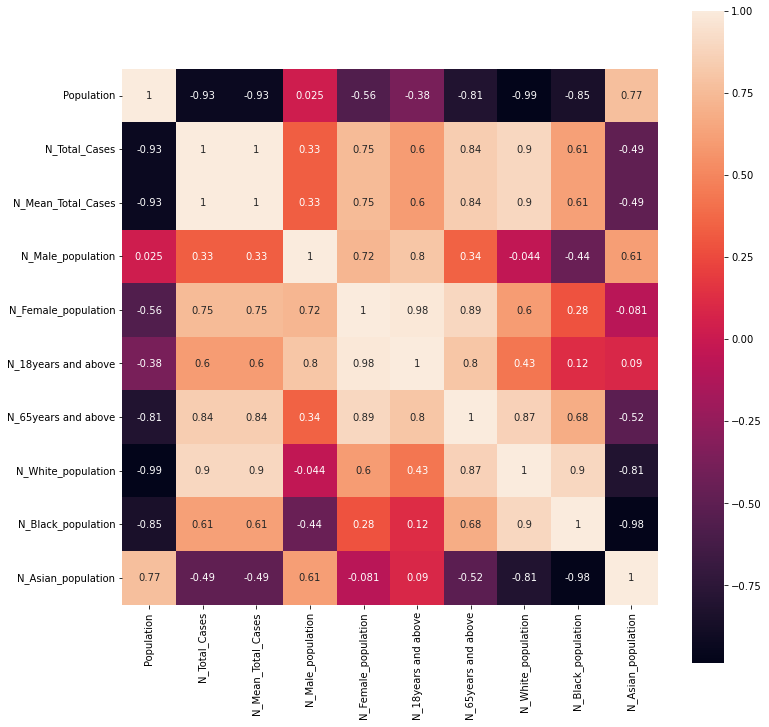

In [53]:
plt.figure(figsize=(12,12))
sns.heatmap(correlation, annot=True, square=True)

Repeated the same for the entire covid-19 cases from start date in the dataframe

In [54]:
mean_new_cases_complete = super_19_df_mean['new_cases'].tolist()
mean_new_cases_complete

[10082.751376146789, 3103.137614678899, 2715.1706422018347, 5962.674311926606]

In [55]:
super_19_cases_df = super_19_df_sum[['State','new_cases']]
super_19_cases_df

,State,new_cases
0,CA,10990199.0
1,NC,3382420.0
2,NJ,2959536.0
3,NY,6499315.0


In [56]:
super_19_cases_df['Mean_Total_Cases']= mean_new_cases_complete
super_19_cases_df['Population'] = population
super_19_cases_df.rename(columns={'new_cases':'Total Cases'},inplace = True)
super_19_cases_df

,State,Total Cases,Mean_Total_Cases,Population
0,CA,10990199.0,10082.751376,39512223
1,NC,3382420.0,3103.137615,10488084
2,NJ,2959536.0,2715.170642,8882190
3,NY,6499315.0,5962.674312,19453561


In [57]:
super_19_cases_df['N_Total_Cases']= (super_19_cases_df['Total Cases']/super_19_cases_df['Population'])*1000000
super_19_cases_df['N_Mean_Total_Cases']= (super_19_cases_df['Mean_Total_Cases']/super_19_cases_df['Population'])*1000000
super_19_cases_df

,State,Total Cases,Mean_Total_Cases,Population,N_Total_Cases,N_Mean_Total_Cases
0,CA,10990199.0,10082.751376,39512223,278146.815480,255.180565
1,NC,3382420.0,3103.137615,10488084,322501.230921,295.872689
2,NJ,2959536.0,2715.170642,8882190,333198.907026,305.687071
3,NY,6499315.0,5962.674312,19453561,334093.845338,306.508115


In [58]:
super_19_cases_df_1 = super_19_cases_df[['State','Population','N_Total_Cases','N_Mean_Total_Cases']]
super_19_cases_df_1

,State,Population,N_Total_Cases,N_Mean_Total_Cases
0,CA,39512223,278146.815480,255.180565
1,NC,10488084,322501.230921,295.872689
2,NJ,8882190,333198.907026,305.687071
3,NY,19453561,334093.845338,306.508115


In [59]:
super_19_census = pd.merge(super_19_cases_df_1,census_demographic_1,on = ['State'])
super_19_census

,State,Population,N_Total_Cases,N_Mean_Total_Cases,Male population,Female population,18years and above,65years and above,White population,Black population,Asian population
0,CA,39512223,278146.815480,255.180565,19714044,19741309,30462921,5669879,20553732,2233258,5887396
1,NC,10488084,322501.230921,295.872689,5067666,5299356,8064707,1686235,6865508,2193147,314690
2,NJ,8882190,333198.907026,305.687071,4539311,4694713,7193582,1494516,5787873,1225321,900516
3,NY,19453561,334093.845338,306.508115,9821711,10293034,15897349,3330159,12215118,3058846,1739196


In [60]:
N_super_19_census= pd.DataFrame()
N_super_19_census['State'] = super_19_census['State']
N_super_19_census['Population'] = super_19_census['Population']
N_super_19_census['N_Total_Cases']= super_19_census['N_Total_Cases']
N_super_19_census['N_Mean_Total_Cases']= super_19_census['N_Mean_Total_Cases']
N_super_19_census['N_Male_population']= (super_19_census['Male population']/super_19_census['Population'])*1000000
N_super_19_census['N_Female_population']= (super_19_census['Female population']/super_19_census['Population'])*1000000
N_super_19_census['N_18years and above']= (super_19_census['18years and above']/super_19_census['Population'])*1000000
N_super_19_census['N_65years and above']= (super_19_census['65years and above']/super_19_census['Population'])*1000000
N_super_19_census['N_White_population']= (super_19_census['White population']/super_19_census['Population'])*1000000
N_super_19_census['N_Black_population']= (super_19_census['Black population']/super_19_census['Population'])*1000000
N_super_19_census['N_Asian_population']= (super_19_census['Asian population']/super_19_census['Population'])*1000000
N_super_19_census


,State,Population,N_Total_Cases,N_Mean_Total_Cases,N_Male_population,N_Female_population,N_18years and above,N_65years and above,N_White_population,N_Black_population,N_Asian_population
0,CA,39512223,278146.815480,255.180565,498935.329455,499625.369091,770974.617146,143496.836409,520186.677424,56520.687282,149001.892402
1,NC,10488084,322501.230921,295.872689,483183.201050,505273.985220,768939.970351,160776.267620,654600.783136,209108.451076,30004.527042
2,NJ,8882190,333198.907026,305.687071,511057.633309,528553.543664,809888.327091,168259.854833,651626.794743,137952.577011,101384.455861
3,NY,19453561,334093.845338,306.508115,504879.852074,529107.961262,817194.805619,171185.059640,627911.671287,157238.358571,89402.449248


In [61]:
correlation1 = N_super_19_census.corr()
correlation1

,Population,N_Total_Cases,N_Mean_Total_Cases,N_Male_population,N_Female_population,N_18years and above,N_65years and above,N_White_population,N_Black_population,N_Asian_population
Population,1.000000,-0.896145,-0.896145,0.025294,-0.560739,-0.377321,-0.811788,-0.987343,-0.849269,0.774009
N_Total_Cases,-0.896145,1.000000,1.000000,0.222958,0.822617,0.701842,0.985735,0.938351,0.773485,-0.631007
N_Mean_Total_Cases,-0.896145,1.000000,1.000000,0.222958,0.822617,0.701842,0.985735,0.938351,0.773485,-0.631007
N_Male_population,0.025294,0.222958,0.222958,1.000000,0.723453,0.803018,0.341622,-0.043858,-0.444882,0.611518
N_Female_population,-0.560739,0.822617,0.822617,0.723453,1.000000,0.978049,0.894559,0.598857,0.282113,-0.081345
N_18years and above,-0.377321,0.701842,0.701842,0.803018,0.978049,1.000000,0.804020,0.427075,0.116075,0.089722
N_65years and above,-0.811788,0.985735,0.985735,0.341622,0.894559,0.804020,1.000000,0.866791,0.680357,-0.516530
N_White_population,-0.987343,0.938351,0.938351,-0.043858,0.598857,0.427075,0.866791,1.000000,0.896157,-0.810712
N_Black_population,-0.849269,0.773485,0.773485,-0.444882,0.282113,0.116075,0.680357,0.896157,1.000000,-0.978820
N_Asian_population,0.774009,-0.631007,-0.631007,0.611518,-0.081345,0.089722,-0.516530,-0.810712,-0.978820,1.000000


<AxesSubplot:>

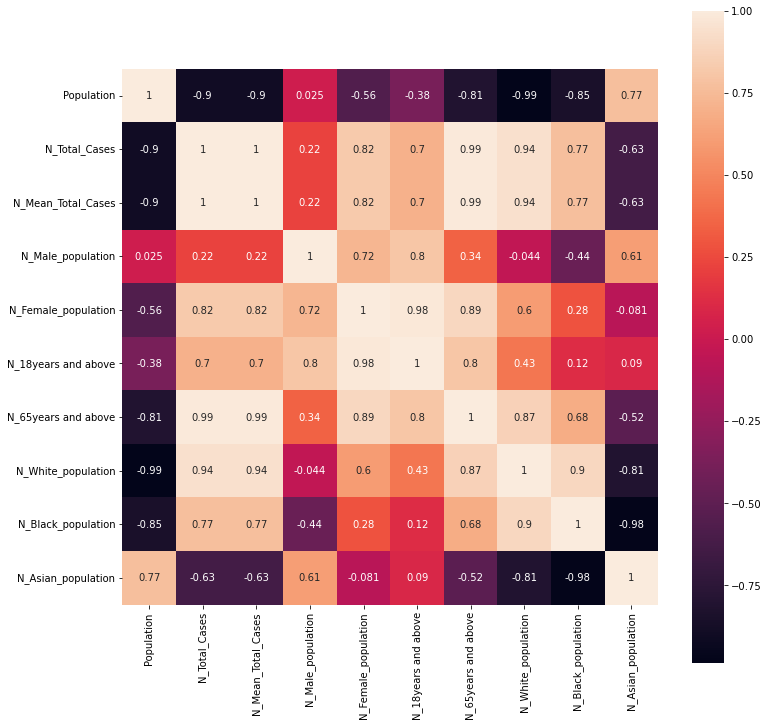

In [62]:
plt.figure(figsize=(12,12))
sns.heatmap(correlation1, annot=True, square=True)

We know that the correlation coefficient always lies in between 1 and -1. Similar to covariance, positive correlation coefficient indicates that the columns are directly related and negative coefficient indicates that the columns are inversely related to each other. If the correlation coefficient is near to zero then that columns are weakly related to each other. 

From the first heatmap which is on the Normalized data from date range May 30th 2022 to Jan 2nd 2023 if we observe the correlation coefficient is high between Mean_total_Cases and Female population, White population, 65years and above, Black population,18years and above. And correlation coefficient is very less (Nearly zero) between Mean_Total_Cases and  Male population and correlation coefficient is negative between Mean_Total_Cases and Asian population.

Correlation coefficients are also similar between Total_Cases and other columns as mentioned in the above description.

Coming to the second heatmap the results obtained is similar to the results obtained in the first heatmap. The relationship mentioned for the first heatmap valids for the second heatmap too.

## 3) Formulate hypothesis between Enrichment data and number of cases to be compared against states. Choose 3 different variables to compare against.

- Does the increase in white population increases in the spread of covid-19 cases?

- Covid cases are more in the age group of 65 years and above

- Covid cases spread is low in the Male population

- Covid cases are less among the Asian population

References:

- https://stackoverflow.com/questions/67255139/how-to-change-the-edgecolor-of-an-histogram-in-plotly

- https://plotly.com/python/multiple-axes/

- https://stackoverflow.com/questions/66687274/fitting-poisson-distribution-to-data-in-python

- https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.moment.html

- https://github.com/c-zhu3/CSC405-605-Spring2023-Project/tree/master/Lectures/Statistics

